# Session 8, Logistic Regression

## The Logistic Classifier

Regression techniques are typically used for predicting the real-valued output. But what if the output is discrete and even binary - 0 and 1 - i.e. what if we are dealing with a binary classification problem based on the real-valued input variables? 

Consider a training sample of size $N$ for a binary output variable 
$${\displaystyle y = }
\left\{ \begin{array}{l l} 
{1} & \quad \text{event happened }\\ 
{0} & \quad \text{event not happened } \\
\end{array} \right.
$$
and $n$ regressors $x^j$: 
$$
X=\{x_i, i=1..N\}=\{x_i^j, i=1..N, j=1..n\},\ Y=\{y_i, i=1..N\}.
$$ 

As before, instead of trying to predict the spefic value of $y$, we admit its uncertainty considering it a binary random variable, trying to predict its probability distribution (Bernoulli as the only meaningfull one for a binary variable):

$$
P(y|x,\beta)=Bern(y|\mu(x,\beta))
$$

A simplest suggestion for $\mu$ would be a linear model:

$$
\mu(x,\beta)=x\beta,
$$

however as $\mu=P(d=1)$ is the probability, it can only take values between 0 to 1, while there is no good way to ensure that the linear form $x\beta$ takes value within this interval. This could be corrected by considering 
$$
\mu(x,\beta)=f(x\beta),
$$
where $f$ is a certain function taking values only between 0 and 1. As for this function $f$, one can select a sigmoid function
$$
f(x)=\sigma(x)=\frac{e^x}{1+e^x}=\frac{1}{1+e^{-x}}.
$$
Sigmoid function always takes values within the interval $(0,1)$. This way 

$$
{\displaystyle P(y=1) = \sigma(x\beta)=\frac{\exp(x\beta)}{1+\exp(x\beta)}}=\frac{1}{1+\exp(-x\beta)}
$$$$
\displaystyle P(y=0) = 1-P(y=1)=\frac{1}{1+\exp(x\beta)}
$$

Then the likelihood of getting observed values of the output variable $y_i$ corresponding to the inputs $x_i$ can be defined as
$$
L=\prod\limits_i P(y=y_i|x_i,\beta),
$$
while log-likelihood is
$$
log(L)=\sum\limits_i log\left(P(y=y_i|x_i,\beta)\right)=\sum\limits_i y_i log\left(P(y=1|x_i,\beta)\right)+
\sum\limits_i (1-y_i)log\left(P(y=0|x_i,\beta)\right)=
$$$$
-\sum\limits_i log\left(1+exp((2 y_i-1)x_i\beta)\right).
$$
Then
$$
\beta=argmin_{\beta} \sum\limits_i log\left(1+exp((2 y_i-1)x_i\beta)\right).
$$
The above optimization problem can no longer be solved in the closed analytic form, but instead a multivariate iterational numerical optimization heuristics, such as various gradient decent methods, could be applied. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import statsmodels.formula.api as smf
%pylab inline
#import shapefile

Populating the interactive namespace from numpy and matplotlib


In [2]:
pylab.rcParams['image.cmap'] = 'RdYlGn'

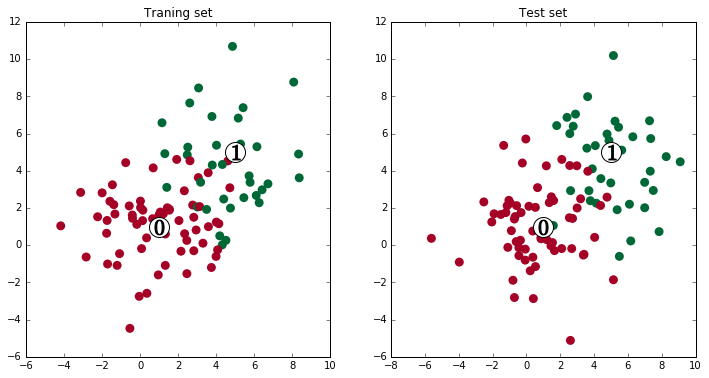

In [3]:
# generate some random 2d data points around two centroid points (1,1) and (6,6)
# classified based on which of the centroids was used, (1,1) label 0 and (6,6) with label 1
n = 100
random.seed(2016)
label = np.random.binomial(1, 0.4, size = 2*n)  # Bernoulli is binomial with n = 1
x = np.array([1,5])[label] + np.random.normal(0, 2, size = 2*n)
y = np.array([1,5])[label] + np.random.normal(0, 2, size = 2*n)

#visualization
fig1 = plt.figure(figsize = (12,6))
ax1, ax2 = fig1.add_subplot(121), fig1.add_subplot(122)
ax1.scatter(x[:n], y[:n], lw = 0, s = 80, c = label[:n])
ax2.scatter(x[n:], y[n:], lw = 0, s = 80, c = label[n:])
ax1.set(title = 'Traning set')
ax2.set(title = 'Test set')
center = [1,5]
ax1.scatter(center, center, marker='o', c="w", alpha=1, s=400)
ax2.scatter(center, center, marker='o', c="w", alpha=1, s=400)
for i, c in enumerate(center):
    ax1.scatter(c, c, marker='$%d$'%i, alpha=1, s=220,color = 'k')
    ax2.scatter(c, c, marker='$%d$'%i, alpha=1, s=220,color = 'k')

Optimization terminated successfully.
         Current function value: 0.248665
         Iterations 8


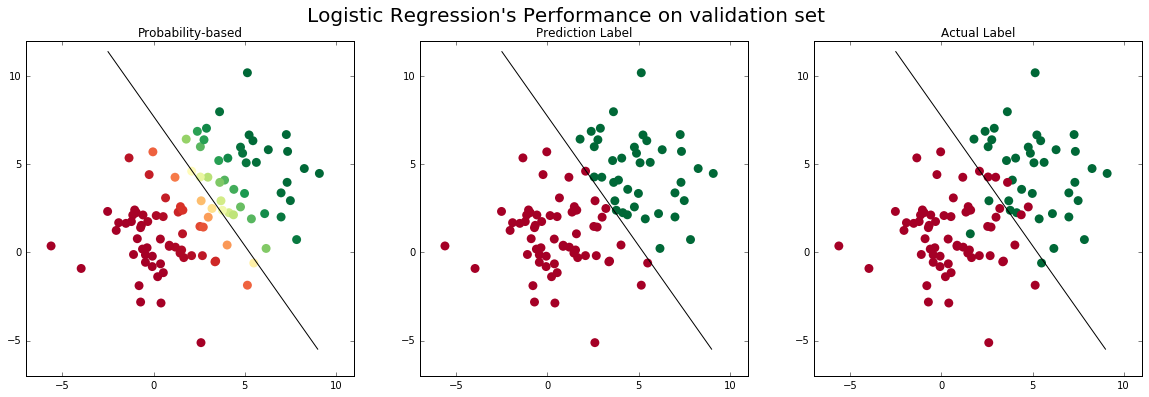

In [4]:
train = pd.DataFrame({'label':label[:n],'x':x[:n],'y':y[:n]})
test = pd.DataFrame({'label':label[n:],'x':x[n:],'y':y[n:]})

#learn logistic regression over the training sample
logit = smf.logit('label ~ x + y', data = train).fit()

#apply to the validation sample
logPred = logit.predict(test)
labelPred = logPred > 0.5
labelActual = label[n:]

#visualize the probabilities
xplot = np.linspace(-2.5,9,200)
yplot = -(logit.params[0] + logit.params[1]*xplot)/logit.params[2]

fig2 = plt.figure(figsize = (20,6))
plt.suptitle("Logistic Regression's Performance on validation set", fontsize = 20)
ax1, ax2, ax3 = fig2.add_subplot(131), fig2.add_subplot(132), fig2.add_subplot(133)
ax1.plot(xplot,yplot,'k')
ax2.plot(xplot,yplot,'k')
ax3.plot(xplot,yplot,'k')
ax1.set(title='Probability-based', xlim = [-7,11], ylim = [-7,12])
ax2.set(title='Prediction Label', xlim = [-7,11], ylim = [-7,12])
ax3.set(title='Actual Label', xlim = [-7,11], ylim = [-7,12])
ax1.scatter(x[n:], y[n:], lw = 0, s = 80, c = logPred)   # Predicted values (continuous probability)
ax2.scatter(x[n:], y[n:], lw = 0, s = 80, c = labelPred)  # Binary visualization
ax3.scatter(x[n:], y[n:], lw = 0, s = 80, c = labelActual)   # Actual values

## Confusion matrix

Fit of the binary classificator over the selected test set can be characterized by the confusion matrix
$$
\left[\begin{array}{c|c}TP&FN\\
\hline
FP&TN\end{array}\right]
$$
with
* $TP$ - number of true positives (correctly classified positives ($y_i=1$)), 
* $FP$ - number of false positives (observed negatives ($y_i=0$) incorrectly classified as positives ($y_i=1$)), 
* $FN$ - number of false negatives (observed positives ($y_i=1$) incorrectly classified as negatives ($y_i=0$)), 
* $TN$ - number of true negatives (correctly classified negatives ($y_i=0$)).

In relative terms the following quantities are often considered:

* Precision or positive predictive value (fraction of true positive classifications among all actual positive observations):
$$
PPV=\frac{TP}{TP+FP},
$$
* Sensitivity or recall or true positive rate (fraction of true positives among all positive classifications):
$$
TPR=\frac{TP}{TP+FN},
$$
* Accuracy (fraction of true classifications among all instances considered)
$$
ACC=\frac{TP+TN}{TP+TN+FP+FN}.
$$

In [5]:
#compute TP,FP,FN,TN for the above classification
TP = sum((labelPred==1)&(labelActual==1))
FP = sum((labelPred==1)&(labelActual==0))
FN = sum((labelPred==0)&(labelActual==1))
TN = sum((labelPred==0)&(labelActual==0))

#compute precision, accuracy and recall
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))

Precision = 87.18%
Accuracy = 92.00%
Recall = 91.89%


## Practice
### Interpreting logit coeffients and statistics
Example - learning the probability of school admission based on marks and school type

In [6]:
# Read in some data on graduate school admissions.  These data are fictional, but serve as a useful example.
data = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [7]:
# split sample into training and test ones
#random.seed(2016)
Index = np.random.binomial(1, 0.6, size = len(data))
train, test = data[Index==1], data[Index==0]

In [8]:
# School rank is a categorical feature, and we should capture this aspect using "C(rank)"
# C(rank) tells statsmodels to convert the categorical variable into dummy indicator variables and omit one of them
# The omitted categorical indicator is the reference category.
logit = smf.logit('admit ~ gpa + gre + C(rank)', data = train).fit()
pre = logit.predict(test)>0.5

#compute TP,FP,FN,TN for the above classification
TP = sum((pre==1)&(test.admit==1))
FP = sum((pre==1)&(test.admit==0))
FN = sum((pre==0)&(test.admit==1))
TN = sum((pre==0)&(test.admit==0))
#compute precision, accuracy and recall
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))

Optimization terminated successfully.
         Current function value: 0.571107
         Iterations 5
Precision = 50.00%
Accuracy = 69.64%
Recall = 23.53%


In [9]:
# interpret regression: probability of admittance to T.1,2,3,4 for gre = 650, gpa = 3.6
for k in range(1,5):
    p = logit.predict(pd.DataFrame({'gre':[650],'gpa':[3.6],'rank':[k]}))[0]  
    print('Probability of admittance to T.%d = %.2f%%'%(k,100*p))

Probability of admittance to T.1 = 67.48%
Probability of admittance to T.2 = 41.26%
Probability of admittance to T.3 = 26.44%
Probability of admittance to T.4 = 22.09%


## Extended case: multiclass classification. Iris dataset with sklearn

In [10]:
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

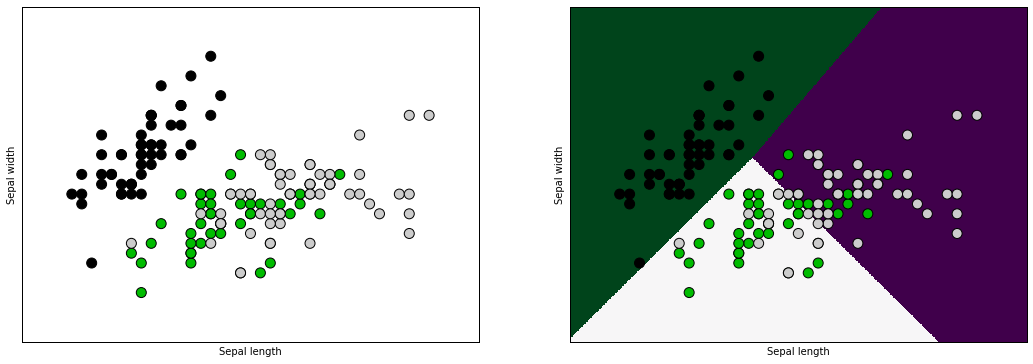

In [11]:
logreg = linear_model.LogisticRegression(C = 1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max] times [y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 600), np.linspace(y_min, y_max, 600))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig3 = plt.figure(3, figsize=(18, 6))

ax1, ax2 = fig3.add_subplot(121), fig3.add_subplot(122)

# Plot also the training points
ax1.scatter(X[:, 0], X[:, 1], c=Y, s = 100, edgecolors='k', cmap=plt.cm.spectral)
ax1.set(xlabel = 'Sepal length', ylabel='Sepal width', xticks=(), yticks=(),
       xlim = ((xx.min(), xx.max())), ylim = ((yy.min(), yy.max())))

ax2.pcolormesh(xx, yy, Z, cmap = plt.cm.PRGn_r)
ax2.scatter(X[:, 0], X[:, 1], c=Y, s = 100, edgecolors='k', cmap=plt.cm.spectral)
ax2.set(xlabel = 'Sepal length', ylabel='Sepal width', xticks=(), yticks=(),
       xlim = ((xx.min(), xx.max())), ylim = ((yy.min(), yy.max())))
plt.show()